### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
data = data.drop('car', axis = 1 )

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
data = data.dropna()
# data.describe() 
# data.info() 

4. What proportion of the total observations chose to accept the coupon? 



In [7]:

prop = data['Y'].sum()/data['Y'].count()
prop 

print(prop)

0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

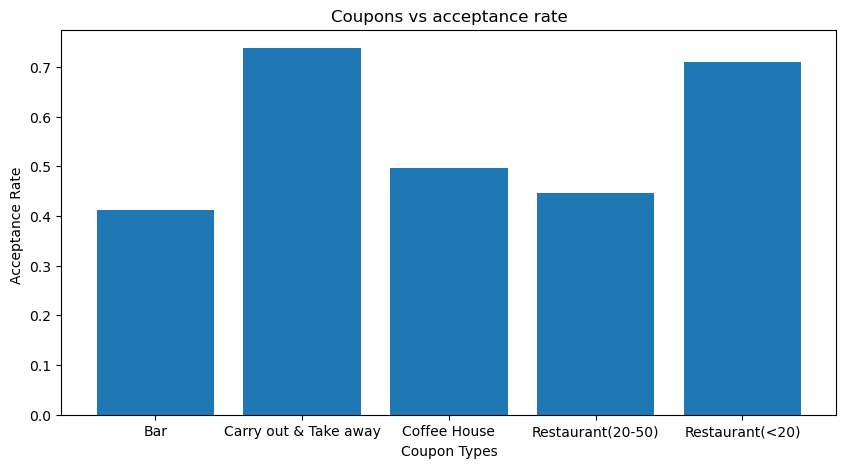

In [8]:
series  =  data.groupby('coupon')['Y'].agg(sum)/ data.groupby('coupon')['Y'].count() 
# print(series)
df = pd.DataFrame({'coupon':series.index, 'rate':series.values})
# print(df)
fig = plt.figure(figsize = (10, 5))
plt.bar(df['coupon'],  df['rate' ] )

plt.xlabel("Coupon Types")
plt.ylabel("Acceptance Rate ")
plt.title("Coupons vs acceptance rate")
plt.show()




6. Use a histogram to visualize the temperature column.

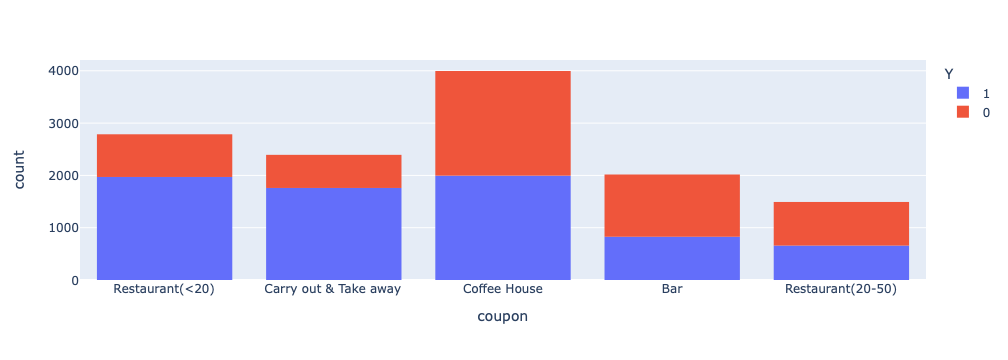

In [129]:
import plotly.express as px 

df = data
fig = px.histogram(df, x="coupon", color = 'Y') 
fig.show()

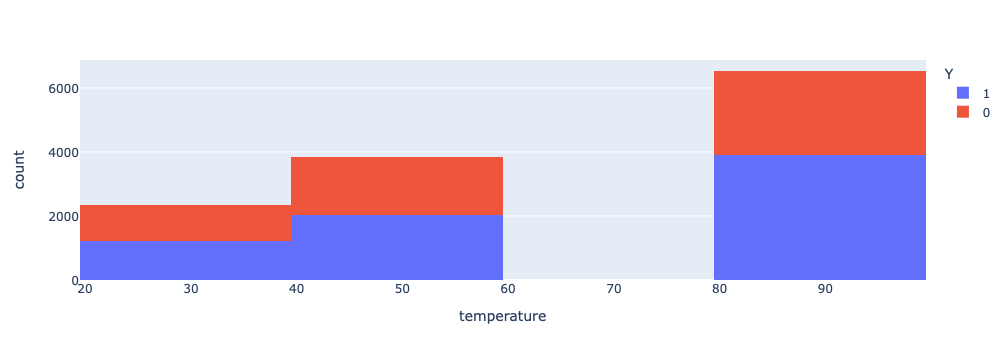

In [125]:
import plotly.express as px 

df = data
fig = px.histogram(df, x="temperature", color = 'Y') 
fig.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [204]:
bardata = data.query('coupon ==  "Bar"')
barList = bardata['Bar'].unique()
barList

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

2. What proportion of bar coupons were accepted?


In [185]:
accepted_coupons = bardata['Y'].sum()
accepted_proportion = accepted_coupons/bardata['Y'].count() 
accepted_proportion

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [186]:
print(bardata['Bar'].unique() )

list_frequency = ['never' ,'less1', '1~3'  ]
three_or_fewer =  bardata[ bardata['Bar'].isin(list_frequency)]['Y'].sum()
three_or_fewer_count = bardata[ bardata['Bar'].isin(list_frequency)]['Y'].count()
acceptance_less_than_three = three_or_fewer/three_or_fewer_count

list_frequency_greater = ['gt8', '4~8']
greater_than_three_frequency =  bardata[ bardata['Bar'].isin(list_frequency_greater)]['Y'].sum()
 
greater_than_three_Count = bardata[ bardata['Bar'].isin(list_frequency_greater)]['Y'].count()
acceptancegreater_than_three = greater_than_three_frequency/greater_than_three_Count

print('acceptanceLessThanThree = ', acceptance_less_than_three ,'acceptancegreaterThanThree = ', acceptancegreater_than_three)

['never' 'less1' '1~3' 'gt8' '4~8']
acceptanceLessThanThree =  0.37267441860465117 acceptancegreaterThanThree =  0.7616580310880829


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [187]:
list_more_than_once = ['1~3', 'gt8' ,'4~8'] 

frequency_4 = bardata.query(' "age" > 25' and  'Bar in @list_more_than_once ')['Y'].sum()  
totalCount_4 = bardata.query(' "age" > 25' and  'Bar  in @list_more_than_once  ')['Y'].count()  
acceptance4 = frequency_4/totalCount_4
print('acceptance4 = ', acceptance4)

others_frequency_4 = bardata['Y'].sum()  - frequency_4
others_count_4 = bardata['Y'].count()  - totalCount_4
othersacceptance4 = others_frequency_4/others_count_4
print('othersacceptance4 = ', othersacceptance4)

acceptance4 =  0.6853146853146853
othersacceptance4 =  0.2953020134228188


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [205]:
occupation_list = ['farming', 'fishing', 'forestry']

list_more_than_once = ['1~3', 'gt8' ,'4~8'] 
data_more_than_once = bardata.query(' passanger != "Kid(s)" and Bar in @list_more_than_once and occupation not in @occupation_list' )

acceptance5 = data_more_than_once['Y'].sum()/data_more_than_once['Y'].count()
print(acceptance5)
 
acceptance_others_5 = ( bardata['Y'].sum() - data_more_than_once['Y'].sum() )/ (bardata['Y'].count()  -  data_more_than_once['Y'].count())
print(acceptance_others_5)


0.7094339622641509
0.29790310918293567


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [206]:
list_more_than_once = ['1~3', 'gt8' ,'4~8'] 

print(bardata['RestaurantLessThan20'].unique() )
list_more_than_four = ['4~8', 'gt8'  ]

query1 = ' passanger != "Kid(s)" and Bar   in @list_more_than_once  and  maritalStatus != "widowed"' 
ans6_1 = bardata.query(query1)['Y'].sum() / bardata.query(query1)['Y'].count()

query2 = ' "age" < 30'  and  'passanger != "Kid(s)" '   and 'Bar   in @list_more_than_once '
ans6_2 = bardata.query(query2)['Y'].sum() / bardata.query(query2)['Y'].count()

income_list = ['$37500 - $49999' , '$12500 - $24999' , '$25000 - $37499', 'Less than $12500']
query3 =  'RestaurantLessThan20 in @list_more_than_four and income in @income_list '
ans6_3 = bardata.query(query3)['Y'].sum() / bardata.query(query3)['Y'].count()

print(ans6_1)
print(ans6_2)
print(ans6_3)


['4~8' '1~3' 'less1' 'gt8' 'never']
0.7094339622641509
0.6853146853146853
0.45645645645645644


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Passenger without kids tend to use coupon more
persons aged more than 25 tend to use coupon more often
Persons with income less than 50k use coupon to cheap restaurant less likely 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [212]:
coupondata = data.query('coupon ==  "Carry out & Take away"')
# coupondata

In [207]:
accepted_coupons_sum = coupondata['Y'].sum()
acceptance_rate = accepted_coupons_sum/coupondata['Y'].count() 
acceptance_rate

0.737719298245614

In [208]:
# array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)
# Compare the acceptance rate between those who went to a CarryAway 3 or fewer times a month to those who went more.

list_visit_count = ['never', 'less1', '1~3']
data_visits =  coupondata[ coupondata['CarryAway'].isin(list_visit_count)]['Y'].sum() 
data_visits_total = coupondata[ coupondata['CarryAway'].isin(list_visit_count)]['Y'].count() 
print(data_visits )
print(data_visits_total ) 
acceptance_less_than_three = data_visits/data_visits_total

#get data for - Compare the acceptance rate between those who went to a CarryAway  who went more than 3 times . 
list_visit_greater = ['gt8', '4~8']
data_visits_greater_sum =  coupondata[ coupondata['CarryAway'].isin(list_visit_greater)]['Y'].sum() 
data_visits_greater_count = coupondata[ coupondata['CarryAway'].isin(list_visit_greater)]['Y'].count() 
acceptance_greater_than_three = data_visits_greater_sum/data_visits_greater_count

print('acceptance_less_than_three = ', acceptance_less_than_three ,'acceptance_greater_than_three = ', acceptance_greater_than_three)

869
1201
acceptance_less_than_three =  0.723563696919234 acceptance_greater_than_three =  0.7534754402224282


In [215]:
# Compare the acceptance rate between drivers who go to a CarryAway  more than once a month and are over the age of 25 to the all others. 
#Is there a difference?
list_more_than_once = ['1~3', 'gt8' ,'4~8'] 

data_more_than_once_age_over_25 = coupondata.query(' "age" > 25' and  'Bar in @list_more_than_once ')['Y'].sum()  
total_count = coupondata.query(' "age" > 25' and  'Bar in @list_more_than_once ')['Y'].count()  
acceptance2 = data_more_than_once_age_over_25/totalCount
print('acceptance2 = ', acceptance2)
 
others_y_sum = coupondata['Y'].sum()  - data_more_than_once_age_over_25
others_count = coupondata['Y'].count()  - total_count
othersacceptance2 = others_y_sum/others_count
print('othersacceptance2 = ', othersacceptance2)


acceptance2 =  0.9038461538461539
othersacceptance2 =  0.738276299112801


In [210]:
# Use the same process to compare the acceptance rate between drivers who go to CarryAway more than once a month and had passengers
# that were not a kid and had occupations other than farming, fishing, or forestry.

occupation_list = ['farming', 'fishing', 'forestry']

data_more_than_once = coupondata.query(' passanger != "Kid(s)" and CarryAway != "less1" and  occupation not in @occupation_list' )
acceptance3 = data_more_than_once['Y'].sum()/data_more_than_once['Y'].count()
print(acceptance3)
 
acceptance_others_3 = ( coupondata['Y'].sum() - data_more_than_once['Y'].sum() )/ (coupondata['Y'].count()  -  data_more_than_once['Y'].count())
print(acceptance_others_3)

0.7509620670698186
0.6854663774403471


In [211]:
# Compare the acceptance rates between those drivers who:
# go to   CarryAway  more than once a month, had passengers that were not a kid, and were not widowed OR
# go to CarryAway more than once a month and are under the age of 30 OR
# go to cheap restaurants more than 4 times a month and income is less than 50K.

query1 = ' passanger != "Kid(s)" and CarryAway != "less1" and  maritalStatus != "widowed"' 
ans6_1 = coupondata.query(query1)['Y'].sum() / coupondata.query(query1)['Y'].count()

query2 = ' "age" < 30'  and  'passanger != "Kid(s)" ' and 'CarryAway != "less1"'
ans6_2 = coupondata.query(query2)['Y'].sum() / coupondata.query(query2)['Y'].count()

income_list = ['$37500 - $49999' , '$12500 - $24999' , '$25000 - $37499', 'Less than $12500']

query3 =  'RestaurantLessThan20 != "never" and income in @income_list '
ans6_3 = coupondata.query(query3)['Y'].sum() / coupondata.query(query3)['Y'].count()

print(ans6_1)
print(ans6_2)
print(ans6_3)



0.7509620670698186
0.7480640165203923
0.751269035532995
